# importing the library

In [11]:

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings(action="ignore")

# read the data

In [13]:
data=pd.read_csv('fetal_health.csv')

In [14]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [18]:
data.shape

(2126, 22)

# handling missing values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [20]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# handling inbalance data

In [21]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

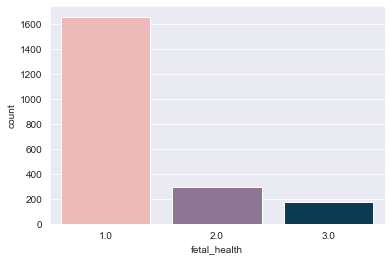

In [23]:
colors=['#f7b2b0','#8f7198','#003f5c']
sns.countplot(data=data,x="fetal_health",palette=colors)

# discriptive statistics

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# univariate analysis

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

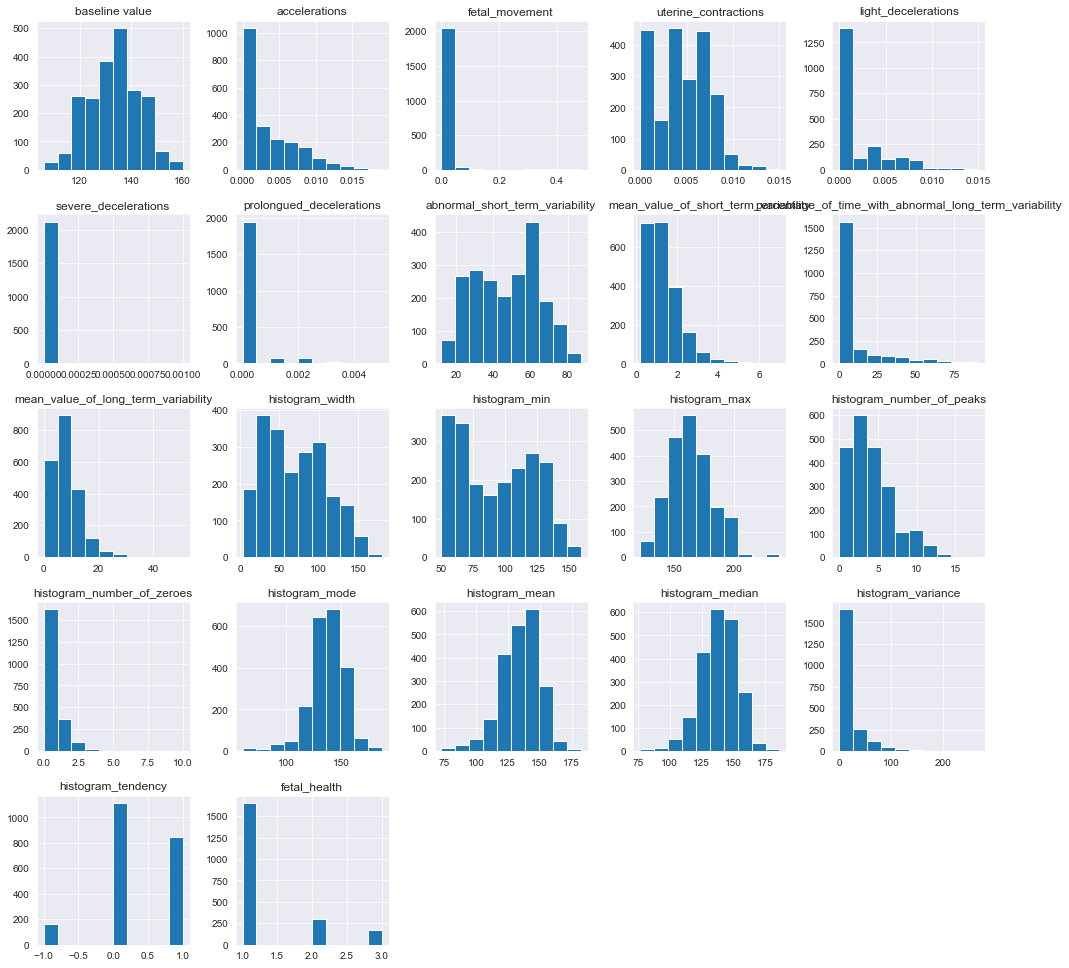

In [26]:
data.hist(figsize=(17,17), layout=(5,5), sharex=False)

# bivariate analysis

<AxesSubplot:xlabel='fetal_movement', ylabel='fetal_health'>

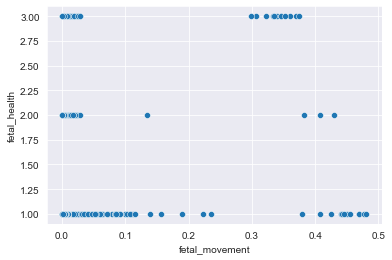

In [27]:
sns.scatterplot(x=data.fetal_movement, y=data.fetal_health)

# multivariate analysis

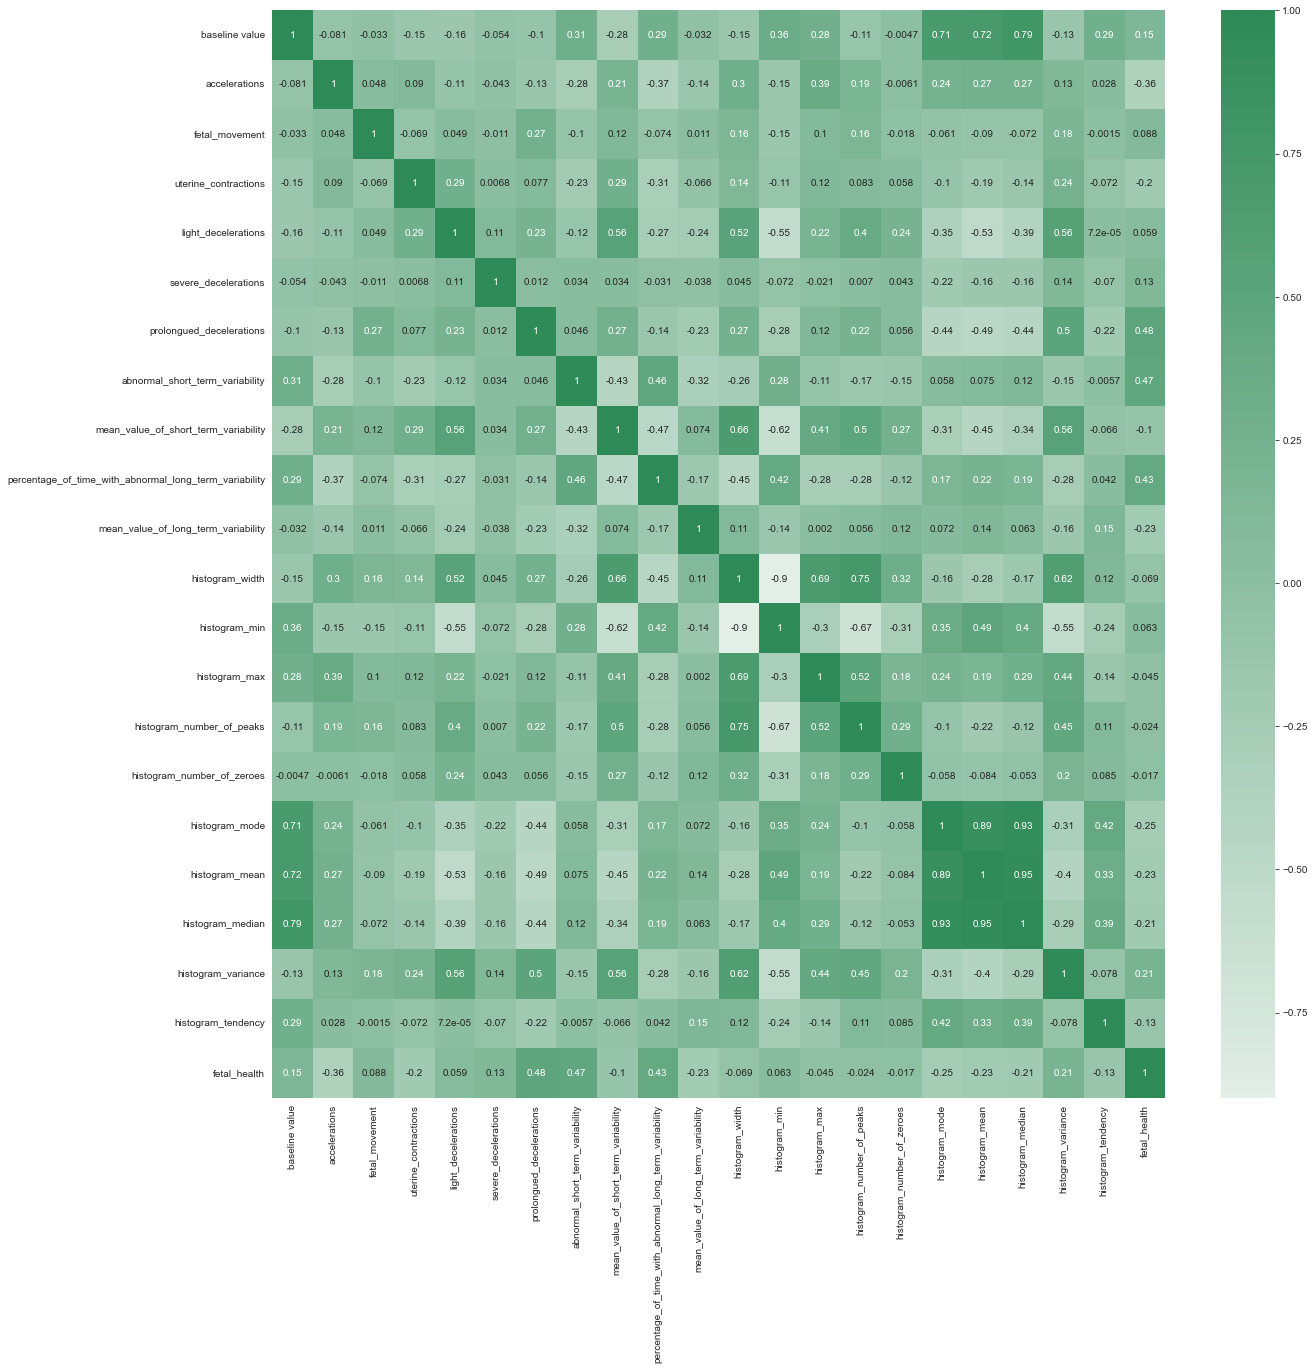

In [29]:
import matplotlib.pyplot as plt

corrmat = data.corr()
plt.figure(figsize=(20, 20))
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.show()

# feature selection

In [30]:
data.drop(columns=["histogram_mean"],axis=1,inplace=True)

In [31]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [32]:
new_data=data.loc[:,["accelerations","prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability","histogram_variance","histogram_median","histogram_mode"]]

In [33]:
new_data.head()

,accelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_variance,histogram_median,histogram_mode
0,0.000,0.0,73.0,43.0,2.4,73.0,121.0,120.0
1,0.006,0.0,17.0,0.0,10.4,12.0,140.0,141.0
2,0.003,0.0,16.0,0.0,13.4,13.0,138.0,141.0
3,0.003,0.0,16.0,0.0,23.0,13.0,137.0,137.0
4,0.007,0.0,16.0,0.0,19.9,11.0,138.0,137.0


In [36]:
x = data.drop(columns=['fetal_health', 'baseline value', 'severe_decelerations', 'fetal_movement','histogram_min', 'light_decelerations', 'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'histogram_max', 'histogram_width', 'mean_value_of_short_term_variability', 'histogram_tendency', 'uterine_contractions'])
y=data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,accelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_median,histogram_variance
0,0.000000,0.0,0.813333,0.472527,0.047337,0.472441,0.403670,0.271375
1,0.315789,0.0,0.066667,0.000000,0.205128,0.637795,0.577982,0.044610
2,0.157895,0.0,0.053333,0.000000,0.264300,0.637795,0.559633,0.048327
3,0.157895,0.0,0.053333,0.000000,0.453649,0.606299,0.550459,0.048327
4,0.368421,0.0,0.053333,0.000000,0.392505,0.606299,0.559633,0.040892


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x_train.shape,x_test.shape

((1488, 8), (638, 8))

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [39]:
x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)

In [40]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE : ",Counter(y_train_smote))

Before SMOTE : Counter({1.0: 1158, 2.0: 201, 3.0: 129})
After SMOTE :  Counter({1.0: 1158, 2.0: 1158, 3.0: 1158})
